# **Análisis**
#### Analizaremos la tabla de fotometría para luego generar la curva de luz de nuesta estrella de estudio

Importamos lo necesario

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utilidades

from astropy.stats import sigma_clipped_stats
from astropy.coordinates import SkyCoord, match_coordinates_sky
import astropy.units as u
from astropy.table import QTable
from astropy.io import fits
from astropy.wcs import WCS, utils
from astropy.visualization import ImageNormalize, ZScaleInterval
#from astropy.timeseries import TimeSeries

#### Leo las tablas de fotometría y coordenadas

In [2]:
fot_file = 'fotometria.csv'
coords_file = 'coords.ecsv'
fot = pd.read_csv(fot_file,parse_dates=['MJD'], index_col='MJD')
coor = QTable.read(coords_file, format='ascii.ecsv')
coor.add_index('id')

### Tabla de coordenadas e ids

In [3]:
coor[:5]

id,skycoord
,"deg,deg"
str3,object
s1,"339.9309116332052,-46.958963466049454"
s2,"339.97534729282194,-46.9560703554799"
s3,"339.8063180584164,-46.94610018595023"
s4,"339.7743848599585,-46.942926485111876"
s5,"339.9244439002668,-46.94245405519429"


### Tabla de fotometría

In [4]:
fot.head()

,FNAME,DATE,s1,merr1,s2,merr2,s3,merr3,s4,merr4,...,s35,merr35,s36,merr36,s37,merr37,s38,merr38,s39,merr39
MJD,,,,,,,,,,,,,,,,,,,,,
58756.030185,Vv0001w.fits,2019-09-30T00:43:27.984,16.024970,0.003435,17.458331,0.003547,14.748751,0.003413,16.049598,0.003534,...,16.571017,0.003594,17.560019,0.003556,16.347230,0.003581,16.407893,0.003570,13.572741,0.024889
58756.032454,Vv0002w.fits,2019-09-30T00:46:44.026,15.650981,0.003365,17.412934,0.003426,14.459724,0.003125,15.634734,0.003420,...,16.126401,0.003434,16.857862,0.003416,15.977360,0.003334,16.381542,0.003358,13.546273,0.024114
58756.036319,Vv0003w.fits,2019-09-30T00:52:17.962,15.646482,0.003264,NaN,0.003348,14.453447,0.003114,15.733661,0.003421,...,16.373565,0.003454,16.775800,0.003331,15.926216,0.003326,16.367673,0.003439,15.802078,0.003290
58756.037442,Vv0004w.fits,2019-09-30T00:53:54.989,15.701221,0.003292,17.465068,0.003337,14.570795,0.003166,15.667977,0.003420,...,16.277240,0.003424,16.824760,0.003395,16.040129,0.003254,16.295359,0.003434,16.021246,0.003306
58756.038565,Vv0005w.fits,2019-09-30T00:55:32.016,15.813292,0.003314,17.663729,0.003352,14.501020,0.003155,15.758010,0.003443,...,16.149872,0.003418,16.783766,0.003322,16.049595,0.003351,16.295348,0.003447,13.480450,0.025240


#### El método describe de pandas muestra una pequeña estadistica de las columnas

In [5]:
fot.describe()

,s1,merr1,s2,merr2,s3,merr3,s4,merr4,s5,merr5,...,s35,merr35,s36,merr36,s37,merr37,s38,merr38,s39,merr39
count,50.000000,50.000000,49.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,15.666081,0.003347,17.497650,0.003408,14.487750,0.003149,15.797912,0.003452,11.609204,0.001457,...,16.350912,0.003455,16.917434,0.003396,16.023076,0.003330,16.441422,0.003462,14.461011,0.016412
std,0.073812,0.000052,0.377036,0.000049,0.056061,0.000051,0.082382,0.000052,0.045842,0.000030,...,0.443711,0.000053,0.164724,0.000052,0.090479,0.000055,0.431298,0.000051,1.104679,0.010322
min,15.505320,0.003264,16.202484,0.003308,14.403071,0.003061,15.629607,0.003326,11.585941,0.001437,...,15.862007,0.003329,16.580628,0.003246,15.836324,0.003251,15.720456,0.003348,13.410798,0.003290
25%,15.635722,0.003304,17.273246,0.003366,14.450475,0.003117,15.753660,0.003432,11.596956,0.001445,...,16.201084,0.003425,16.822226,0.003367,15.970468,0.003290,16.279830,0.003431,13.595304,0.003380
50%,15.653025,0.003328,17.425897,0.003404,14.488246,0.003153,15.785274,0.003455,11.601870,0.001451,...,16.286707,0.003462,16.872169,0.003390,16.013914,0.003336,16.392800,0.003471,13.679080,0.024069
75%,15.687906,0.003387,17.635769,0.003445,14.511890,0.003170,15.825138,0.003477,11.608816,0.001462,...,16.410435,0.003482,17.015613,0.003425,16.076949,0.003362,16.489092,0.003493,15.825973,0.024470
max,16.024970,0.003483,18.536978,0.003547,14.748751,0.003413,16.049598,0.003586,11.918663,0.001655,...,19.269512,0.003594,17.560019,0.003556,16.347230,0.003581,19.141531,0.003570,16.021246,0.025240


## Empezamos limpiando los datos
#### Tiramos todas las columna con NaNs y con errores en la magnitud mayores a la centecima.

In [6]:
fot=fot.dropna(axis='columns')

Genero un index con los nombres de las columnas referidas a fuentes

In [7]:
mags = fot.columns[fot.columns.str.contains('s')]
mags

Index(['s1', 's3', 's4', 's5', 's6', 's8', 's9', 's10', 's11', 's12', 's13',
       's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21', 's22', 's23',
       's25', 's26', 's28', 's29', 's30', 's31', 's33', 's34', 's35', 's36',
       's37', 's38', 's39'],
      dtype='object')

De esa lista tomo solo las fuentes con errores medios en la magnitud menores a la centecima de magnitud

In [8]:
mags_list = list(mags)
for mag in mags_list:
    merr = 'merr'+mag[1:]
    if fot[merr].mean() > 0.01:
        mags = mags.drop(mag)
merrs = pd.Index('merr'+mag[1:] for mag in mags)

### Obtengo la tabla limpia

In [9]:
fot = fot[mags.union(merrs, sort=False)]
fot.head()

,s1,s3,s4,s5,s6,s8,s9,s10,s11,s12,...,merr28,merr29,merr30,merr31,merr33,merr34,merr35,merr36,merr37,merr38
MJD,,,,,,,,,,,,,,,,,,,,,
58756.030185,16.024970,14.748751,16.049598,11.918663,17.320275,13.258500,17.248769,16.753579,14.859654,17.074064,...,0.003558,0.003620,0.003519,0.003539,0.003612,0.003545,0.003594,0.003556,0.003581,0.003570
58756.032454,15.650981,14.459724,15.634734,11.612085,17.133677,12.908578,16.621900,16.251146,14.543105,16.842088,...,0.003413,0.003459,0.003308,0.003408,0.003633,0.003438,0.003434,0.003416,0.003334,0.003358
58756.036319,15.646482,14.453447,15.733661,11.609189,17.206520,12.940529,16.717918,16.357426,14.537561,17.287116,...,0.003238,0.003463,0.003375,0.003414,0.003515,0.003450,0.003454,0.003331,0.003326,0.003439
58756.037442,15.701221,14.570795,15.667977,11.641761,17.446458,12.952102,16.490799,16.107581,14.563629,17.049226,...,0.003411,0.003461,0.003374,0.003393,0.003433,0.003434,0.003424,0.003395,0.003254,0.003434
58756.038565,15.813292,14.501020,15.758010,11.598854,17.067459,12.925067,16.529098,16.390847,14.523608,16.996756,...,0.003417,0.003361,0.003433,0.003400,0.003462,0.003429,0.003418,0.003322,0.003351,0.003447


### Facilmente puedo graficar las magnitudes con pandas

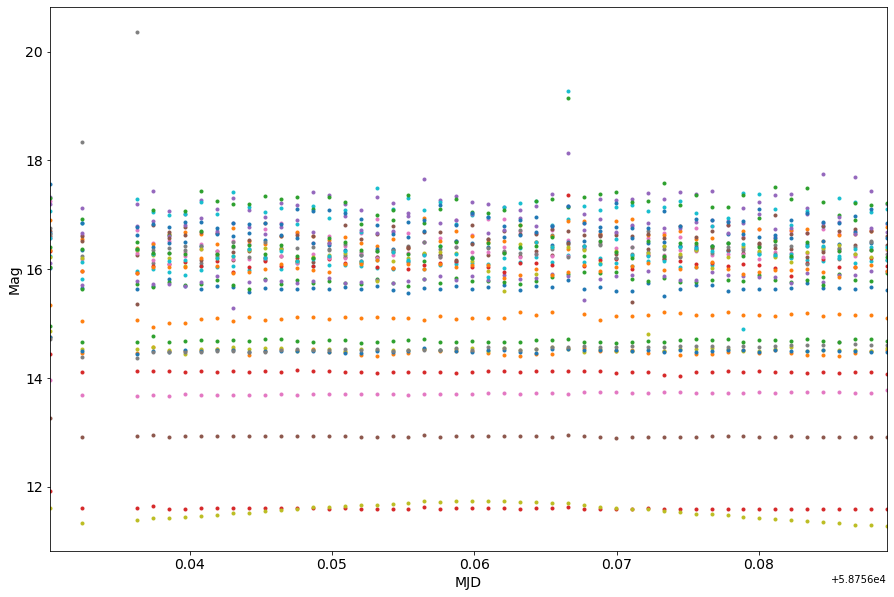

In [10]:
_ = fot[mags].plot(style='.', legend=False,figsize=(15,10))
plt.ylabel('Mag', fontsize=14)
plt.xlabel('MJD', fontsize=14)
plt.tick_params(labelsize=14)
plt.show()

### Busco las coordenadas de mi estrella varible 

In [11]:
RVGru = SkyCoord.from_name('RV Gru')
RVGru

<SkyCoord (ICRS): (ra, dec) in deg
    (339.85171673, -46.87560464)>

#### Abro una imagen para mostrarla

In [12]:
nueva = 'Imagenes_wcs/Vv0001w.fits'
with fits.open(nueva) as hdul:
    hdul.info()
    hdr = hdul[0].header
    data = hdul[0].data
    wcs = WCS(hdr)

Filename: Imagenes_wcs/Vv0001w.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     178   (1024, 1024)   int16 (rescales to uint16)   


#### Paso las coordenadas celestes a pixel para graficar

In [13]:
coor['x_pix'] = coor['skycoord'].to_pixel(wcs)[0]
coor['y_pix'] = coor['skycoord'].to_pixel(wcs)[1]

#### Me fijo que fuente corresponde con las coordenadas de mi variable

In [14]:
RVGru_x = coor[RVGru.match_to_catalog_sky(coor['skycoord'])[0]]['x_pix']
RVGru_y = coor[RVGru.match_to_catalog_sky(coor['skycoord'])[0]]['y_pix']
RVGru_id = coor[RVGru.match_to_catalog_sky(coor['skycoord'])[0]]['id']
RVGru_id

's21'

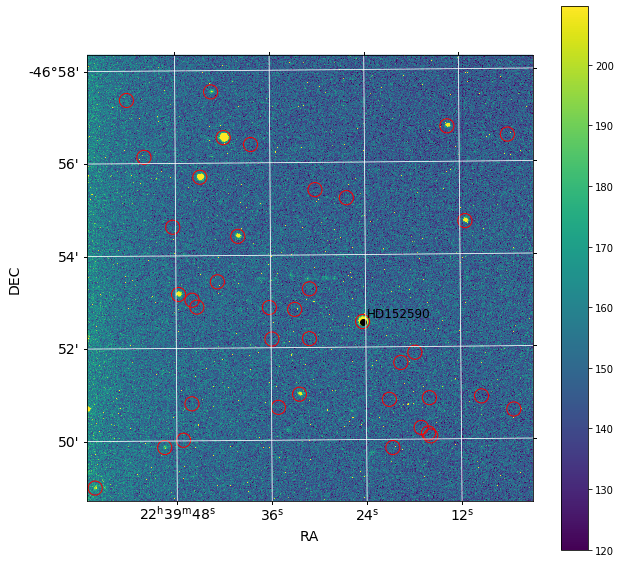

In [15]:
interval=ZScaleInterval()
vmin, vmax = interval.get_limits(data)
norm = ImageNormalize(vmin=vmin, vmax=vmax)

fig, ax = plt.subplots(figsize=(10,10))
ax = plt.subplot(projection=wcs)
img = ax.imshow(data, origin='lower', norm=norm)
sc = ax.scatter('x_pix', 'y_pix', data=coor, facecolor='none', edgecolor='r', marker='o', lw=1, s=200)
ax.scatter(RVGru_x, RVGru_y, color='k')
ax.text(RVGru_x+10, RVGru_y+10, 'HD152590', size='large' )

plt.colorbar(img)
ax.grid(color='white', ls='solid')
ax.set_xlabel('RA', fontsize=14)
ax.set_ylabel('DEC', fontsize=14)
ax.tick_params(labelsize=14)
plt.show()

### Tomo todas las estrellas y calculo fotometría diferencial a cada una
* N = nro de estrellas
* M = nro de imágenes
* k = nro de estellas 
* j = nro de imagen

#### Para cada estrella genero una curva de fotometría diferencial respecto a las demas. Aquellas estrellas cuyas curvas tengan mayor dispersión las descarto hasta quedarme con la fracción de estrellas más constantes.  
#### Procedimiento:

1. Para estrella $i$ calculo los pesos:
$$w_k = \frac{1}{\langle merr_k^2 \rangle}, \quad k\ne i$$ donde k es el número de fuente.

2. Calculo magnitud media pesada de la imagen $j$, sin sumar estrella $i$:
$$\langle m_j \rangle_{k\ne j}^{w_k} = \frac{\sum_{k\ne j}^N m_{kj} w_k}{\sum_{k\ne j}^N w_k}$$

3. Genero fotometría diferencial de estrella $i$  
$$\Delta m_{ij} = m_{ij} - \langle m_j \rangle_{k\ne j}^{w_k}$$

4. Calculo nuevos pesos  
$$w_k = \frac{1}{\sigma_k^2}, \quad \sigma_k^2 = stddev(\Delta m_k), \quad k\ne i$$

5. Vuelvo a generar las curvas de fotometría diferencial con los nuevos pesos (pasos 2 y 3)

6. Calculo la desviación estandar de las curvas  
$$\sigma_i = stddev(\Delta mi)$$
para luego descartar el $10\%$ de las estrellas con mayor dispersión.

In [16]:
mejores = utilidades.CalcMejores(fot,n=3)

In [17]:
mejores

s5     0.510720
s8     0.396438
s16    0.092841
dtype: float64

In [18]:
coor.loc[list(mejores.index)]

id,skycoord,x_pix,y_pix
,"deg,deg",,
str3,object,float64,float64
s5,"339.9244439002668,-46.94245405519429",312.98376838155815,833.3680361491371
s8,"339.9369420881023,-46.928255637474635",259.28640098578927,742.5262795437186
s16,"339.94854866215985,-46.886097219955246",210.54780457522963,473.61776880105293


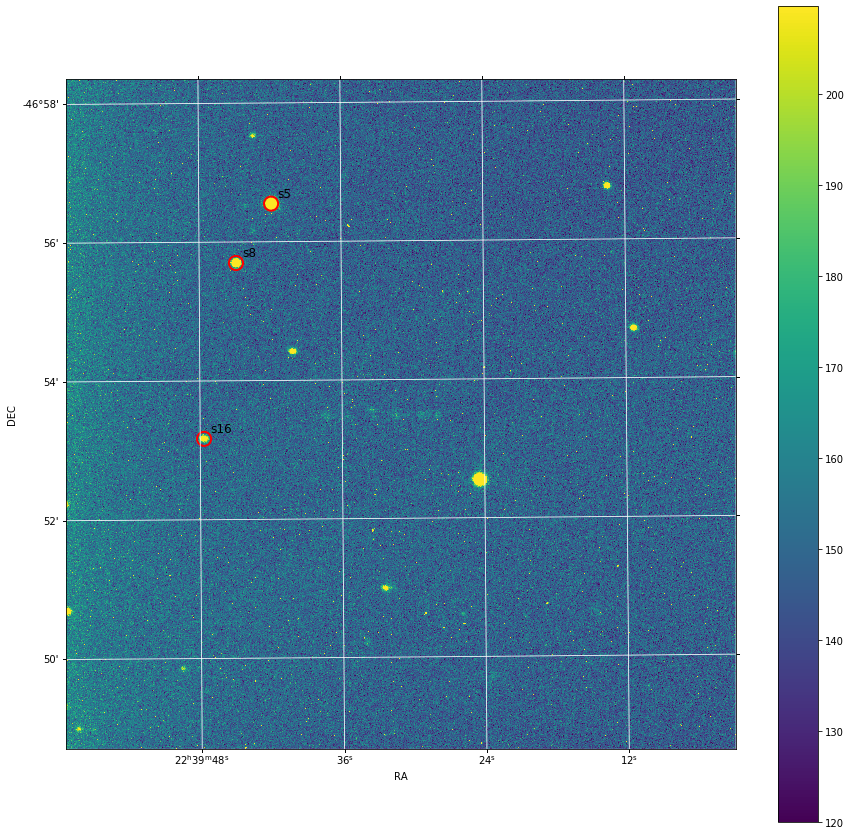

In [19]:
interval=ZScaleInterval()
vmin, vmax = interval.get_limits(data)
norm = ImageNormalize(vmin=vmin, vmax=vmax)

fig, ax = plt.subplots(figsize=(15,15))
ax = plt.subplot(projection=wcs)
img = ax.imshow(data, origin='lower', norm=norm)
sc = ax.scatter('x_pix', 'y_pix', data=coor.loc[list(mejores.index)], 
                facecolor='none', edgecolor='r', marker='o', lw=2, s=200)
for row in coor.loc[list(mejores.index)]:
    ax.text(row['x_pix']+10, row['y_pix']+10, row['id'], size='large' )
plt.colorbar(img)
ax.grid(color='white', ls='solid')
ax.set_xlabel('RA')
ax.set_ylabel('DEC')

#### Armo mí estrella artificial de comparación

In [20]:
Comp = (fot[mags]*mejores).sum('columns')

## Grafico la curva de fotometría diferencial

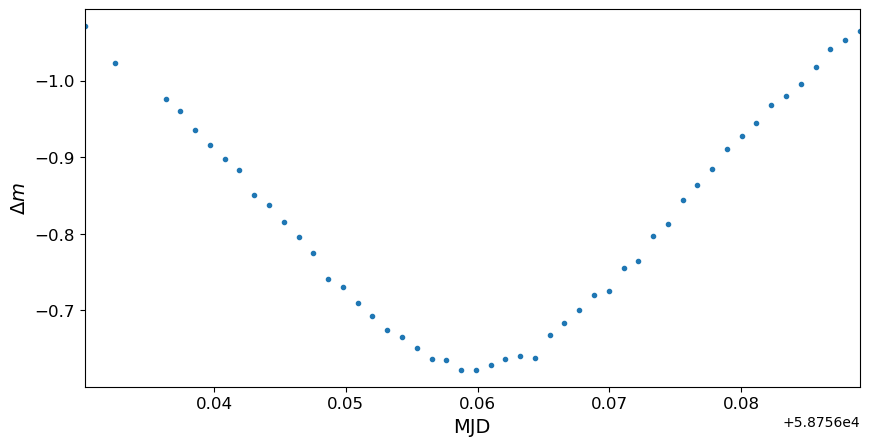

In [21]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100)
plot = (fot[RVGru_id] - Comp).plot(style='.')
ax.invert_yaxis()
ax.set_xlabel('MJD', fontsize=14)
ax.set_ylabel('$\Delta m$', fontsize=14)
ax.tick_params(labelsize=12)
plt.show()

In [22]:
from astropy.timeseries import TimeSeries, LombScargle

In [23]:
m = (fot[RVGru_id] - (fot[mags]*mejores).sum('columns')).values
t = np.array((fot[RVGru_id] - (fot[mags]*mejores).sum('columns')).index)

In [24]:
frequency, power = LombScargle(t, m).autopower()

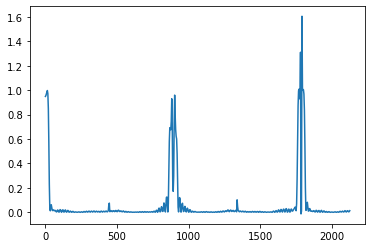

In [25]:
plt.plot(frequency, power) 

In [26]:
best_frequency = frequency[np.argmax(power)]

In [27]:
best_frequency

1790.2074127155843